# Lab 1
Hara Kumar (19940905-3676)
Yeongwoo Kim (19890909-7753)

In [390]:
import numpy as np
import matplotlib.pyplot as plt

In [400]:
import numpy as np
import random

class Bank_Rob:
    def __init__(self, eps, discount, maze, init_pos):
        self.action = ['still', 'left', 'right', 'up', 'down']
        self.eps = eps
        self.maze = maze
        self.size = maze.shape
        self.init_pos = init_pos.copy()
        self.current_pos = init_pos
        self.state = self.build_state()
        self.action_size = len(self.action)
        self.discount = discount
        self.Q_table = self.build_Q_table()
        self.cnt_updates = np.zeros([len(self.state), len(self.action)])
        self.stay_still = []
        self.go_right = []
        self.go_down = []

    def check_available_actions(self, position):
        actions = self.action.copy()
        removed_idx = []
        if position[0] == 0:
            actions.remove('left')
            removed_idx.append(1)
        elif position[0] == 3:
            actions.remove('right')
            removed_idx.append(2)
        if position[1] == 0:
            actions.remove('up')
            removed_idx.append(3)
        elif position[1] == 3:
            actions.remove('down')
            removed_idx.append(4)
        return actions, removed_idx
        
    def build_state(self):
        state_list = dict()
        Q_table = dict()
        cnt = 0
        for i in range(self.size[0]):
            for j in range(self.size[1]):
                for k in range(self.size[0]):
                    for l in range(self.size[1]):
                        state_list[cnt] = [i,j,k,l]
                        cnt += 1
        return state_list 
    
    def build_Q_table(self):
        Q_table = np.zeros([len(self.state), len(self.action)])
        for key in self.state:
            actions, removed_idx = self.check_available_actions(self.state[key][0:2])
            for idx in removed_idx:
                Q_table[key, idx] = 0#-np.inf              
        return Q_table

    def behavior_policy(self, current_postion):
        available_actions, removed_idx = self.check_available_actions(current_postion)
        '''
        criterion = random.uniform(0, 1.0)
        if criterion < 1-self.eps:
            Q_table_idx = list(self.state.keys())[list(self.state.values()).index(current_postion)]
            selected_action = self.action[np.argmax(self.Q_table[Q_table_idx])]
        else:
            selected_action = random.choice(available_actions)         
        ''' 
        selected_action = random.choice(available_actions)         
        return selected_action

    def random_policy(self, current_postion):
        available_actions,_ = self.check_available_actions(current_postion)
        selected_action = random.choice(available_actions)     
        return selected_action

    def move(self, selected_action, current_position):
        if selected_action == 'left':
            current_position[0] -= 1
        elif selected_action == 'right':
            current_position[0] += 1
        elif selected_action == 'up':
            current_position[1] -= 1
        elif selected_action  == 'down':
            current_position[1] += 1
        else:
            pass
        return current_position
        
    def check_reward(self):
        pos_robber = self.current_pos[0:2] 
        pos_police = self.current_pos[2:4]
        if pos_robber == pos_police:
            rwd = -10
        elif pos_robber == [1,1]:
            rwd = 1
        else :
            rwd = 0
        return rwd
    
    def Q_learning(self):
        #Todo: Q learning study and code it !!!!!!!!
        reward = 0
        still_idx = self.action.index('still')
        down_idx = self.action.index('down')
        right_idx = self.action.index('right')
        init_pos_idx = list(self.state.keys())[list(self.state.values()).index(self.init_pos)]
        for i in range(10000000):
            robber_action = self.behavior_policy(self.current_pos)
            police_action = self.random_policy(self.current_pos[2:4])
            old_state = self.current_pos.copy()
            self.current_pos[0:2] = self.move(robber_action, self.current_pos[0:2])
            self.current_pos[2:4] = self.move(police_action, self.current_pos[2:4])
            reward = self.check_reward()
            old_state_idx = list(self.state.keys())[list(self.state.values()).index(old_state)]
            new_state_idx = list(self.state.keys())[list(self.state.values()).index(self.current_pos)]
            robber_action_idx = self.action.index(robber_action)
            self.cnt_updates[old_state_idx, robber_action_idx] += 1
            alpha = 1/(self.cnt_updates[old_state_idx, robber_action_idx])**(2/3) 
            self.Q_table[old_state_idx, robber_action_idx] += alpha*(reward + self.discount*np.max(self.Q_table[new_state_idx,:])- self.Q_table[old_state_idx, robber_action_idx]) 
            if old_state == self.init_pos and robber_action == 'still':
                self.stay_still.append(self.Q_table[init_pos_idx, still_idx])
            elif old_state == self.init_pos and robber_action == 'down':
                self.go_down.append(self.Q_table[init_pos_idx, down_idx])
            elif old_state == self.init_pos and robber_action == 'right':
                self.go_right.append(self.Q_table[init_pos_idx, right_idx])



In [401]:
initial_pos = [0,0,3,3]
maze =  np.array([[0,0,0,0],
                 [0,1,0,0],
                 [0,0,0,0],
                 [0,0,0,0]])
rob_bank = Bank_Rob(0.1, 0.8, maze, initial_pos)

In [403]:
rob_bank.Q_learning()

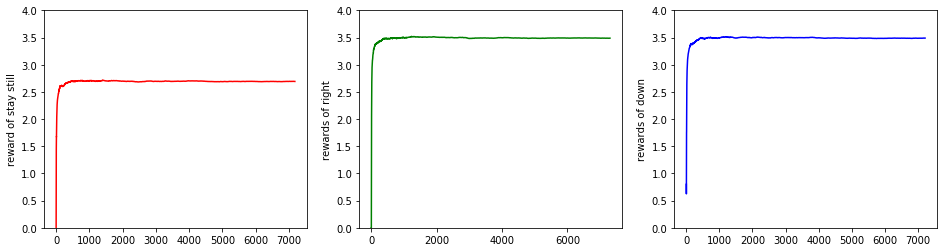

In [423]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(rob_bank.stay_still,'r')
plt.ylim(0, 4)
plt.ylabel('reward of stay still')
plt.subplot(1,3,2)
plt.plot(rob_bank.go_right,'g')
plt.ylim(0, 4)
plt.ylabel('rewards of right')
plt.subplot(1,3,3)
plt.plot(rob_bank.go_down,'b')
plt.ylim(0, 4)
plt.ylabel('rewards of down')
plt.show()